## Solutions (DAY 1)

## Simple Linear Regression

In [12]:
# Load the pggm dataset
pggm = pd.read_csv('http://bit.ly/PGGM_dataset')

In [26]:
# Inspect the data set using a dataframe and fix missing data rows by deleting them

In [13]:
pggm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38304 entries, 0 to 38303
Data columns (total 18 columns):
Identifier               38304 non-null object
Name                     38304 non-null object
Period                   38304 non-null object
Period_YYYYMMDD          38304 non-null int64
Ticker                   38304 non-null object
Universe_Returns_F1W     38300 non-null float64
Universe_Returns_F4W     38296 non-null float64
Universe_Returns_F12W    38268 non-null float64
Weight                   38304 non-null float64
GICS_Sector              38304 non-null object
GICS_Ind_Grp             38304 non-null object
Market_Cap_USD           38304 non-null float64
Price_USD                38304 non-null float64
NTM_EP                   38246 non-null float64
LTM_ROA                  38245 non-null float64
BP                       38288 non-null float64
LTM_EP                   38215 non-null float64
5Y_Sales_Growth          38197 non-null float64
dtypes: float64(11), int64(1), obje

In [14]:
# Remove missing data
pggm = pggm.dropna()

In [15]:
pggm.head()

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392


In [27]:
# # Specify input feature as weight column and output feature as sales growth 

In [17]:
X = pggm.iloc[:, 8] 
y = pggm.iloc[:, 17] 

In [ ]:
# Split the data into training/testing sets in a ratio of 80/20

In [18]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

In [ ]:
# Train the model using the training set

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [20]:
regressor.fit(X=X_train.values.reshape(-1, 1), y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
# Make predictions using the testing set

In [21]:
y_pred = regressor.predict(X_test.values.reshape(-1, 1))

In [22]:
y_pred

array([19.40077618, 19.81905589, 19.6657931 , ..., 15.39997857,
       19.34809209, 16.57658984])

In [ ]:
# plot outputs

Text(0, 0.5, 'Sales Growth')

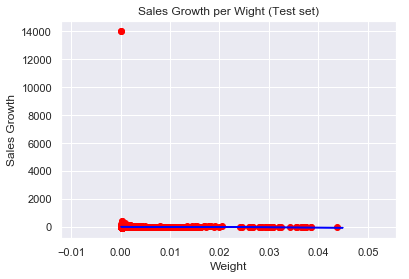

In [25]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train.values.reshape(-1, 1)), color='blue')
plt.title('Sales Growth per Wight (Test set)')
plt.xlabel('Weight')
plt.ylabel('Sales Growth')

## Multiple Linear Regression

In [33]:
# Make a simple plot for the final model provided in the notebook after column deletions

Text(0, 0.5, 'Sales Growth ')

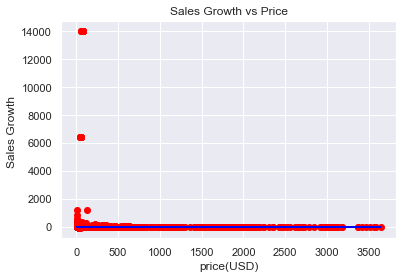

In [43]:
plt.scatter(X_opt['Price_USD'], y, color='red')
plt.plot(X_opt['Price_USD'], regressor_OLS.predict(X_opt), color='blue')
plt.title('Sales Growth vs Price')
plt.xlabel('price(USD)')
plt.ylabel('Sales Growth ')

In [ ]:
# Train a new Multiple regression model of the 5y_Sales_growth on weight and the square of weight and show the new plot
# Hint you may use polynomial regression libraries of scikit-learn or statsmodel

In [48]:
new_X = X[['Weight','constant']]

In [54]:
new_X['Weight_squared'] = new_X['Weight']**2

C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
regressor_OLS = sm.OLS(endog = y, exog=new_X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        5Y_Sales_Growth   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.856
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           0.000143
Time:                        17:13:10   Log-Likelihood:            -2.7252e+05
No. Observations:               38026   AIC:                         5.451e+05
Df Residuals:                   38023   BIC:                         5.451e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Weight         -4314.1086   1038.836     -4.153      0.000   -6350.255   -2277.962
constant          22.0595      2.052     10.752      0.000      18.038      26.081
Weight_squared  1.292e+05   3.99e+04      3.236      0.001    5.09e+04    2.07e+05
==============================================================================
Omnibus:                   111853.227   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5296229487.917
Skew:                          42.025   Prob(JB):                         0.00
Kurtosis:                    1829.372   Cond. No.                     2.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Sales Growth ')

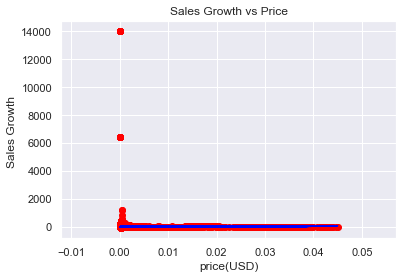

In [61]:
plt.scatter(X['Weight'], y, color='red')
plt.plot(X['Weight'], regressor_OLS.predict(new_X), color='blue')
plt.title('Sales Growth vs Price')
plt.xlabel('price(USD)')
plt.ylabel('Sales Growth ')

In [58]:
# Fitting Polynomial Regression to the dataset with degree of x=2
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(X['Weight'].values.reshape(-1, 1))
poly_reg.fit(x_poly, y)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

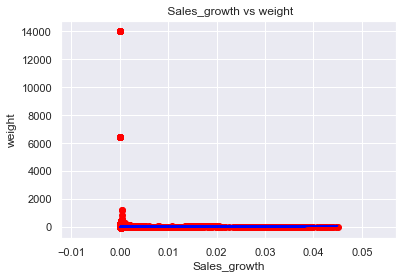

In [60]:
# Visualising the polynomial regression result
plt.scatter(X['Weight'], y, color='red')
plt.plot(X['Weight'], lin_reg2.predict(poly_reg.fit_transform(X['Weight'].values.reshape(-1, 1))), color='blue')
plt.title(" Sales_growth vs weight")
plt.xlabel("Sales_growth")
plt.ylabel("weight")
plt.show()

## Support Vector Machine Rgression

In [ ]:
# Import pggm Data 

In [3]:
pggm = pd.read_csv('http://bit.ly/PGGM_dataset')

In [4]:
pggm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38304 entries, 0 to 38303
Data columns (total 18 columns):
Identifier               38304 non-null object
Name                     38304 non-null object
Period                   38304 non-null object
Period_YYYYMMDD          38304 non-null int64
Ticker                   38304 non-null object
Universe_Returns_F1W     38300 non-null float64
Universe_Returns_F4W     38296 non-null float64
Universe_Returns_F12W    38268 non-null float64
Weight                   38304 non-null float64
GICS_Sector              38304 non-null object
GICS_Ind_Grp             38304 non-null object
Market_Cap_USD           38304 non-null float64
Price_USD                38304 non-null float64
NTM_EP                   38246 non-null float64
LTM_ROA                  38245 non-null float64
BP                       38288 non-null float64
LTM_EP                   38215 non-null float64
5Y_Sales_Growth          38197 non-null float64
dtypes: float64(11), int64(1), obje

In [5]:
# Remove missing data
pggm = pggm.dropna()

In [6]:
pggm.head()

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392


In [ ]:
# Remove unecessary column (We only use weight column as X and sales growth as y)

In [14]:
X = pggm.iloc[:, 8].values.reshape(-1, 1)
y = pggm.iloc[:, 17] .values.reshape(-1, 1)

In [ ]:
# Split the data into training/testing sets in a ratio of 70/30

In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30) 

In [ ]:
# scale the features appropriately

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
# Load the SVR model from sklearn.svm
# Set kernel='linear' as parameter

In [20]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
y_pred = regressor.predict(X_test)

In [23]:
y_pred

array([0.01160912, 0.0110207 , 0.01129957, ..., 0.01161669, 0.01161249,
       0.01164632])

In [ ]:
# Print the score aka Accuracy for training and test sets using regressor.score(X,y)

In [25]:
regressor.score(X_train, y_train)

-0.00012062665432499564

In [24]:
regressor.score(X_test, y_test)

-9.184550283403148e-05

In [ ]:
# Retrain a new SVR model with parameter: (kernel=’rbf’,epsilon=1.0)

In [52]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf',epsilon=1.0, C=2)
regressor.fit(X_train, y_train)

C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=2, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
y_pred = regressor.predict(X_test)

In [54]:
y_pred

array([ 0.5116981 , -0.28007968, -0.42220677, ...,  0.54519871,
        0.52656157,  0.67801399])

In [55]:
regressor.score(X_train, y_train)

-0.1761041411482711

In [56]:
regressor.score(X_test, y_test)

-0.1788873744253643

In [ ]:
# Compare the Results and provide any observable comment on your findings

**NB** : consistency of the results in the rbf kernel versus linear kernel hence better finetinuning is required when you have such discrepancies

## Regression Metrics

In [ ]:
# calculate all the metrics for the simple linear regression exercise

In [18]:
# Load the pggm dataset
pggm = pd.read_csv('http://bit.ly/PGGM_dataset')

In [19]:
pggm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38304 entries, 0 to 38303
Data columns (total 18 columns):
Identifier               38304 non-null object
Name                     38304 non-null object
Period                   38304 non-null object
Period_YYYYMMDD          38304 non-null int64
Ticker                   38304 non-null object
Universe_Returns_F1W     38300 non-null float64
Universe_Returns_F4W     38296 non-null float64
Universe_Returns_F12W    38268 non-null float64
Weight                   38304 non-null float64
GICS_Sector              38304 non-null object
GICS_Ind_Grp             38304 non-null object
Market_Cap_USD           38304 non-null float64
Price_USD                38304 non-null float64
NTM_EP                   38246 non-null float64
LTM_ROA                  38245 non-null float64
BP                       38288 non-null float64
LTM_EP                   38215 non-null float64
5Y_Sales_Growth          38197 non-null float64
dtypes: float64(11), int64(1), obje

In [20]:
# Remove missing data
pggm = pggm.dropna()

In [21]:
pggm.head()

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392


In [22]:
X = pggm.iloc[:, 8] 
y = pggm.iloc[:, 17] 

In [23]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X.values.reshape(-1, 1), y.values.reshape(-1, 1), cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -22.910 (8.707)


In [24]:
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X.values.reshape(-1, 1), y.values.reshape(-1, 1), cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -98321.894 (124995.824)


In [25]:
scoring = 'r2'
results = model_selection.cross_val_score(model, X.values.reshape(-1, 1), y.values.reshape(-1, 1), cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: -0.097 (0.119)
